## Ch04. 분류
### **1. 분류(Classification)의 개요**
* 지도학습의 대표적 유형
* 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
* 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별

### **2. 결정 트리**
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
* 결정 트리의 구조  
: 데이터 세트의 피처가 결합해 새로운 규칙 조건을 만들 때마다 규칙 노드 서브 트리가 만들어짐

* 트리의 깊이(depth)가 깊어질수록 과적합으로 인해 결정 트리의 예측 성능이 저하될 가능성이 높음
* 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 규칙이 정해져야 함 → 이를 위해서는 균일한 데이터 세트를 구성할 수 있도록 분할(Split)하는 것이 필요함
* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
  * 정보의 균일도를 측정하는 방법: 정보 이득(Information Gain) 지수, 지니 계수
  * 사이킷런의 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할

#### 1. 결정 트리 모델의 특징
* 장점: 정보의 '균일도'를 기반으로 해서 알고리즘이 쉽고 직관적
  * 규칙이 명확하고, 이에 규칙/리프 노드가 어떻게 만들어지는지 알 수 있으며 시각화 표현 가능
  * 정보의 균일도만 신경쓰면 되므로 특별한 경우 외에 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
* 단점: 과적합으로 인해 정확도가 떨어짐
  * 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐
  * 복잡한 학습 모델은 결국 실제 상황에(테스트 데이터 세트) 유연하게 대처할 수 없어 예측 성능이 떨어짐
  * 극복: 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움

#### 2. 결정 트리 파라미터
&nbsp;사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공하며 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반임

#### 3. 결정 트리 모델의 시각화
* Graphviz 패키지로 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있음
  * Garphviz: 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
  * **export_graphviz()**: 사이킷런이 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 제공하는 API, 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [1]:
# 붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤 규칙 트리의 형태를 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

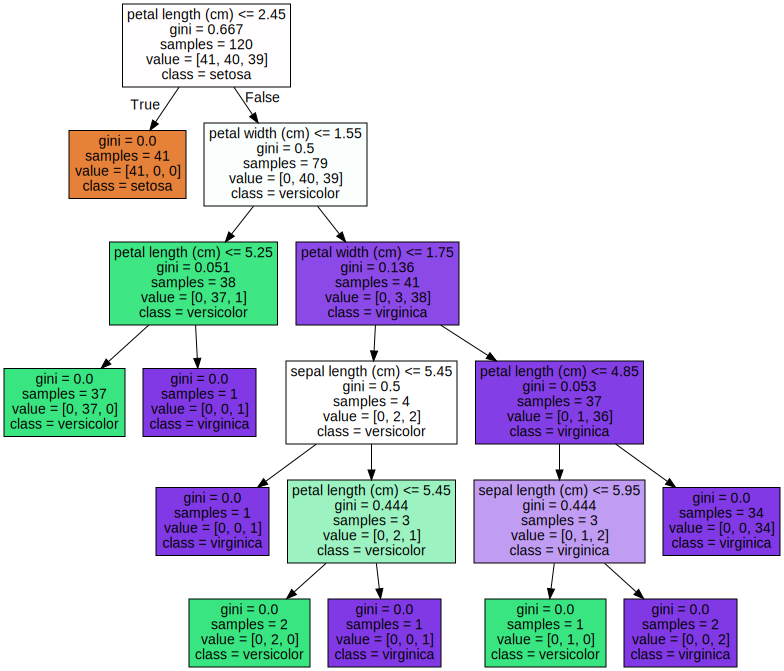

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 리프 노드: 최종 클래스(레이블) 값이 결정되는 노드
  * 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
* 브랜치 노드: 자식 노드가 있는 노드, 자식 노드를 만들기 위한 분할 규칙 조건을 가짐
* 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미 (주황색은 0: Setosa, 초록색은 1: Versicolor, 보라색은 2: Virginica)
  * 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

* 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별하기 위해 트리 노드를 계속 만들고 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점
* 결정 트리 알고리즘을 제어하는 대부분 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도
  * **max_depth**: 결정 트리의 최대 트리 깊이를 제어하는 하이퍼 파라미터
  * **min_samples_splits**: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 지정
  * **min_samples_leaf**: 노드가 분할될 경우, 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수 지정
* 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건
  * 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **freature_importances_** 속성으로 제공함
  * 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것
  * ndarray 형태로 값을 반환, 피처 순서대로 값이 할당

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

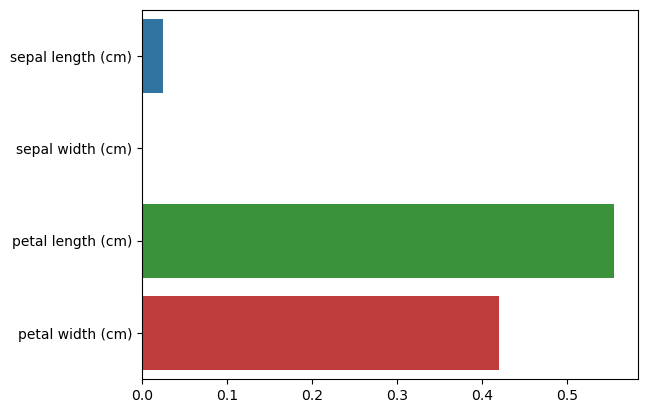

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

#### 4. 결정 트리 과적합(Overfitting)
* 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **make_classification()** 함수를 제공함
  * 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

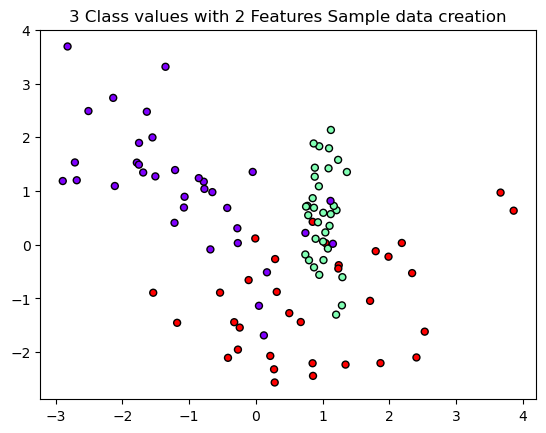

In [5]:
# 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 그래프 형태로 시각화
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 결정값 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

→ 각 피처가 X, Y 축으로 나열된 2차원 그래프, 3개 클래스 값 구분은 색깔로 됨

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

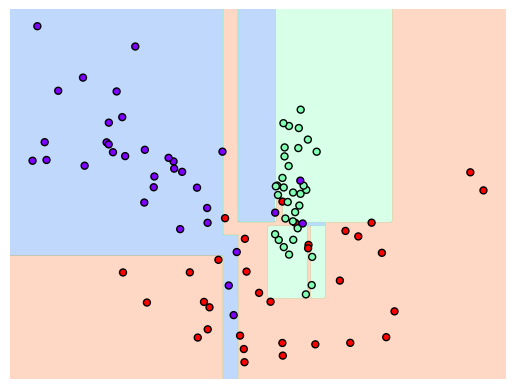

In [7]:
# 첫 번째 학습 시에는 결정 트리 생성에 별다른 제약 없이 하이퍼 파라미터를 디폴트로 하고, 
# 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

→ 디폴트 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준  
→ 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많고 복잡  
→ 예측 정확도 떨어짐

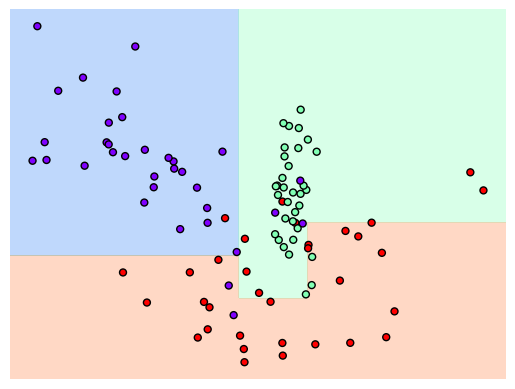

In [9]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

→ 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨  
→ 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문에 트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높음

#### 5.  결정 트리 실습 - 사용자 행동 인식 데이터 세트
해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터  
**수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [11]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


**1. 중복된 피처명을 확인**  
중복된 피처명을 이용해 데이터 파일을 데이터 세트 DataFrame에 로드하면 판다스에서 오류가 발생함

→ 총 42개의 피처명이 중복돼 있음  

In [12]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

**2. 중복된 피처명에 대해 원본 피처명에 _1 또는 _2를 추가해 새로운 피처명을 가지는 DataFrame을 반환하는 함수 get_new_feature_name_df() 생성**

In [15]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

**3. train/test 디렉터리에 있는 학습용/테스트용 피처/레이블 데이터 세트를 로드해 각각 학습/테스트용 DataFrame 생성하는 함수 get_human_dataset()**

* 각 데이터 파일은 공백으로 분리돼 있으므로 read_csv()의 sep 인자로 공백 문자를 입력
* 레이블의 칼럼은 'action'으로 명명 

In [16]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


→ 피처가 전부 float 형의 숫자 형이므로 별도의 카테고리 인코딩은 수행할 필요 없음  
→ X_train.head()로 간략하게 학습용 피처 데이터 세트를 보면 칼럼의 대부분이 움직임 위치와 관련된 속성

In [18]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


→ 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포

**4. 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행**  
하이퍼 파라미터는 모두 디폴트 값으로 설정해 수행

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


→ 약 85.48%의 정확도

In [22]:
# max_depth를 6, 8, 10, 12, 16, 20, 24로 계속 늘리면서 예측 성능을 측정
# 교차 검증은 5개 세트
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8 , 10, 12, 16, 20, 24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


→ max_depth가 8일 때 5개 폴드 세트의 최고 평균 정확도 결과가 약 85.49%로 도출됨

**5. max_depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인**  
max_depth에 따른 평가 데이터 세트의 평균 정확도 수치(cv_results_의 'mean_test_score' 값)를 cv_results_에서 추출

In [23]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


→ mean_test_score는 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치  
→ 깊은 트리는 학습 데이터 세트에는 올바른 예측 결과, 검증 데이터 세트에서는 과적합으로 인한 성능 저하를 유발

**별도의 테스트 데이터 세트에서 결정 트리의 정확도 측정**  
min_samples_split은 16으로 고정하고 max_depth의 변화에 따른 값을 측정

In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

→ max_depth가 8일 경우 약 87.17%로 가장 높은 정확도  
→ 앞의 예제와 마찬가지로 깊이가 깊어질수록 테스트 데이터 세트의 정확도가 더 떨어짐
* **결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어해야 함**

**6. max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝**

In [24]:
params = {
    'max_depth' : [8, 12, 16, 20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


→ max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도로 약 85.49%

**7. 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용해 예측 수행**  
앞 예제의 GridSearchCV 객체인 grid_cv의 속성 best_estimator_는 최적 하이퍼 파라미터로 학습이 완료된 Estimator 객체

In [27]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


**8. 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 확인**  
중요도가 높은 순으로 Top 20 피처를 막대 그래프로 표현

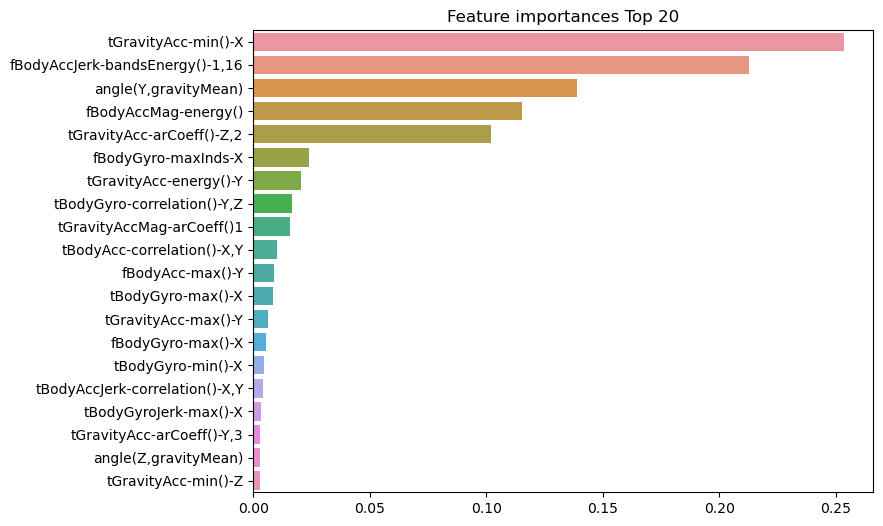

In [28]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### **3. 앙상블 학습**
: 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻음
* 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타냄
* 대표적인 앙상블 알고리즘: 랜덤 포레스트, 그래디언트 부스팅

**<앙상블 학습의 유형>**

* 보팅(Voting): 일반적으로 서로 다른 ML 알고리즘을 가진 분류기를 결합해 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 투표를 통해 최종 예측 결과를 결정하는 방식
* 배깅(Bagging): 같은 ML 알고리즘 유형의 개별 분류기가 서로 다르게 샘플링된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 투표를 통해서 최종 예측 결과를 선정하는 방식
  * 부트스트래핑(Bootstrapping) 분할 방식: 개별 분류기에 할당될 학습 데이터로 원본 학습 데이터를 샘플링해 추출하는 방식
  * 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용함
  * 랜덤 포레스트 알고리즘
* 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것
  * 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)  

&nbsp;이 외에도 스태깅을 포함한 다양한 방법 (스태깅: 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법)

#### 1. 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
1. 하드 보팅: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
2. 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정하는 것
   * 일반적으로 소프트 보팅의 예측 성능이 더 좋아서 많이 사용됨

#### 2. 보팅 분류기 (Voting Classifier)
* 사이킷런은 보팅 방식을 앙상블을 구현한 VotingClassifier 클래스를 제공

**보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석**  

* 위스콘신 유방암 데이터 세트: 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트로 종양의 크기, 모양 등의 형태와 관련한 많은 피처를 가짐
  * 사이킷런의 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있음
* 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 생성

**1. 필요한 모듈과 데이터를 로딩한 후 위스콘신 데이터 세트를 간략히 살펴 봄**

In [29]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**2. 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기를 생성**

* VotingClassifier 클래스의 주요 생성 인자
  * estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
  * voting: 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식을 적용 (디폴트는 'hard')

In [30]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state= 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


* 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음
  * 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기의 성능이 보팅했을 때보다 나을 수도 있음
* 하지만, **앙상블 방법**은 전반적으로 다른 단일 ML 알고리즘보다 **뛰어난 예측 성능**을 가지는 경우가 많음
  * **현실 세계의 다양한 변수와 예측이 어려운 규칙**을 다양한 관점을 가진 알고리즘의 결합으로 구현 가능
* 앙상블 학습에서는 결정 트리 알고리즘의 단점을 매우 많은 분류기를 결합해 다양한 상황을 학습하게 하면서 극복  
  → 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화

### **4. 랜덤 포레스트**
#### 1. 랜덤 포레스트의 개요 및 실습
&nbsp;배깅은 보팅과는 달리, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘으로 배깅의 대표적인 알고리즘은 랜덤 포레스트
* **랜덤 포레스트**: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하는 것
  * **부트스트래핑(Bootstrapping) 분할 방식**: 여러 개의 데이터 세트를 중첩되게 분리하는 것
* 앙상블 알고리즘 중 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능
* 랜덤 포레스트의 **기반 알고리즘은 결정 트리** (부스팅 기반의 다양한 앙상블은 트리를 기반 알고리즘으로 채택)

**사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측**  
* 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원  
* 사용자 행동 데이터 세트를 이용하기 위해 앞서 생성한 get_human_dataset() 함수 이용

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


→ 랜덤 포레스트는 사용자 행동 인식 데이터 세트에 대해 약 92.53%의 정확도를 보여줌

#### 2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝
* 트리 기반 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고 그로 인해 튜닝을 위한 시간이 많이 소모된다는 점
  * 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음
* 랜덤 포레스트는 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문에 일반적으로 다른 ML 알고리즘에 비해 파라미터가 적은 편

**GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝**  
* 랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능
* 따라서 GBM 보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많음

**1. 최적 하이퍼 파라미터 추출**

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params, cv=2, n_jobs=-1 )
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


**2. 최적 하이퍼 파라미터로 다시 학습 시킨 뒤 별도의 테스트 데이터 세트에서 예측 성능 측정**

In [33]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


**3. feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도 막대그래프 시각화**

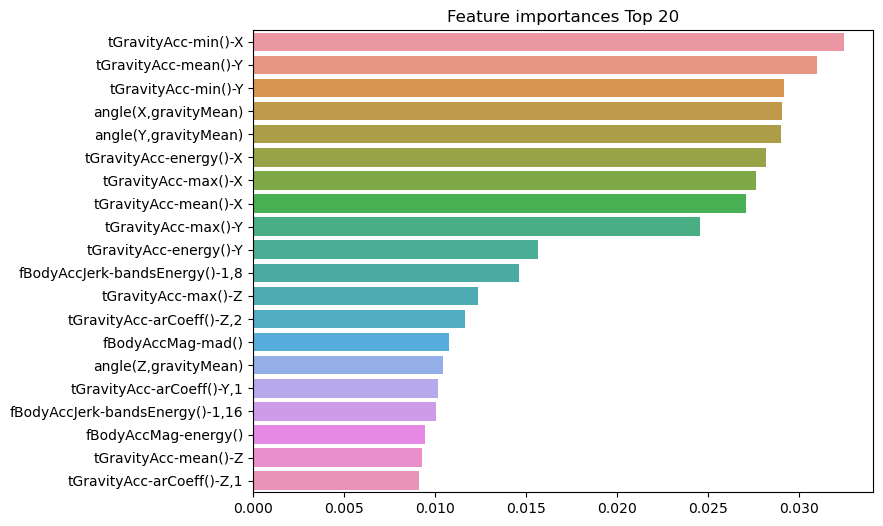

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

### **5. GBM(Gradient Boosting Machine)**
#### 1. GBM의 개요 및 실습
&nbsp;부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측 하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식으로 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트
* 에이다 부스트(AdaBoost): 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
  * 개별 약한 학습기에 각각 가중치를 부여한 후 모두 결합해 예측을 수행함
* GBM(Gradient Boost Machine): 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용
  * 오류 값 = 실제 값 - 예측 값 ($h(x) = y - F(x)$)
  * **경사 하강법(Gradient Descent)**: 오류를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것
  * 사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공

In [35]:
# 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 630.9 초 


→ 기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 랜덤 포레스트보다 나은 예측 성능을 나타냄
* 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음
* GBM은 과적합에도 강한 뛰어난 예측 성능을 가짐
* 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요한 단점

#### 2. GBM 하이퍼 파라미터 소개
/

### **6. XGBoost(eXtra Gradient Boost)**
#### 1. XGBoost 개요
* 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
* GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결함
* XGBoost의 주요 장점
  1) 뛰어난 예측 성능: 일반적으로 분류와 회귀 영역에서 다른 ML 보다 뛰어난 예측 성능을 발휘
  2) GBM 대비 빠른 수행 시간: 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장
  3) 과적합 규제 (Regularization): 자체 과적합 규제 기능
  4) Tree pruning (나무 가지치기): 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 줄이는 방법
  5) 자체 내장된 교차 검증
  6) 결손값 자체 처리
* **파이썬 래퍼 XGBoost 모듈**: 초기의 독자적인 XGBoost 프레임워크 기반의 모듈
* **사이킷런 래퍼 XGBoost 모듈**: 사이킷런과 연동되는 모듈

#### 2. XGBoost 설치하기

#### 3. 파이썬 래퍼 XGBoost 하이퍼 파라미터
&nbsp;XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가됨
* **일반 파라미터**: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터
  * 디폴트 파라미터의 값을 바꾸는 경우는 거의 없음
* **부스터 파라미터**: 트리 최적화, 부스팅, regularization 등 관련 파라미터
  * *eta* \[default=0.3, alias: learning_rate]: GBM의 학습률(learning rate)과 같은 파라미터, 0~1 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1
  * *num_boost_rounds*: GBM의 n_estimators와 같은 파라미터
* **학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

* 뛰어난 알고리즘일수록 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분
* 파라미터를 튜닝하는 경우는 피처의 수가 많거나 피처 간 상관되는 정도가 많거나 데이터 세트에 따른 여러 가지 상황
* 과적합 문제가 심각하다면 다음의 적용을 고려
  * eta 값을 낮춤(0.01 ~ 0.1) eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 함
  * max_depth 값을 낮춤
  * min_child_weight 값을 높임
  * gamma 값을 높임
  * subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움

* 기본 GBM에서 부족한 여러 가지 성능 향상 기능이 있음
* **조기 중단(Early Stopping)**
  * 수행 속도를 향상시키기 위한 대표적인 기능
  * 기본 GBM의 경우 n_estimators(또는 num_boost_rounds)에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하면서 중간에 반복을 멈출 수 없고 지정된 횟수를 다 완료해야 함
  * XGBoost(와 LightGBM)은 **조기 중단** 기능으로 지정한 반복 횟수에 도달하지 않더라도, 조기 중단 파라미터 값 만큼 반복하는 동안 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선

* XGBoost 버전 확인

In [36]:
import xgboost

print(xgboost.__version__)

1.7.3


#### 4. 파이썬 래퍼 XGBoost 적용 – 위스콘신 유방암 예측
&nbsp;일반적으로 수행 성능 향상 XGBoost는 GBM과는 다르게 병렬 처리와 조기 중단 등으로 빠른 수행시간 처리가 가능하지만, CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상을 경험하기 어려울 수도 있음
* 위스콘신 유방암 데이터 세트: 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지 분류
  * 양성 종양(benign tumor): 비교적 성장 속도가 느리고 전이되지 않음
  * 악성 종양(maligmant tumor): 주위 조직에 침입하면서 빠르게 성장하고 신체 각 부위에 확산/전이되어 생명을 위협
* 사이킷런의 load_breast_cancer()를 호출해 로드
 
**위스콘신 유방암 데이터 세트에 기반해 다양한 피처에 따라 악성종양/양성종양을 XGBoost를 이용해 예측**

**1. 위스콘신 유방암 데이터를 DataFrame으로 로드 후 확인**

In [38]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


→ 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어 있음  
→ 타깃 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1 값

**2. 레이블 값의 분포 확인**

In [39]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


→ 1 값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성

**3. 학습/검증/테스트 데이터 분할**

In [41]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


→ 전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출
* **파이썬 래퍼 XGBoost와 사이킷런의 차이**
  * XGBoost만의 전용 데이터 객체인 DMatrix를 사용  
    → NumPy 또는 Pandas 형태의 데이터 세트를 DMatrix로 생성하여 모델에 입력해야 함
  * 구버전은 넘파이를 받아서 DMatrix를 생성했지만, 현버전은 DataFrame과 Series 기반으로도 Dmatrix를 생성 가능
  * DMatrix의 주요 입력 파라미터는 data와 label

In [42]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

**4. XGBoost의 하이퍼 파라미터 설정**  
&nbsp;XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력

In [43]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

**5. 지정된 하이퍼 파라미터로 XGBoost 모델 학습**  
&nbsp;파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달함 (사이킷런의 경우는 Estimator의 생성자를 하이퍼 파라미터로 전달하는 데 반해 차이가 있음)
* **조기 중단의 성능 평가**는 주로 별도의 검증 데이터 세트를 이용함  
  (XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공함)
* 조기 중단은 xgboost의 train() 함수에 early_stopping_rounds 파라미터를 입력해 설정
* 조기 중단 파라미터를 설정해 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해야 함
  * xgboost는 반복마다 지정된 평가용 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정

In [44]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

: **평가용 데이터 세트 설정**은 학습용 DMatrix인 dtr과 검증용 DMatrix인 dval로 설정한 뒤 train() 함수의 evals 인자값으로 입력 (eval_metric은 위에서 params 딕셔너리로 설정했음)  
→ xgboost 학습 반복 시마다 evals에 설정된 데이터 세트에 대해 평가 지표 결과가 출력  
→ train()은 학습이 완료된 모델 객체를 반환

→ train()으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있음  
→ 126번째 반복에서 eval-logloss로 표시되는 검증 데이터에 대한 logloss 값이 0.25587로 가장 낮고, 이후 126번에서 176번까지 **early_stopping_rounds로 지정된 50회 동안 logloss 값이 향상되지 않았기 때문에 조기 중단**

**6. 테스트 데이터 세트에 대한 예측 수행**  
&nbsp;파이썬 래퍼 XGBoost는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환하는데, 이 모델 객체는 예측을 위해 predict() 메소드를 이용함  
→ 유의할 점은 사이킷런의 predict() 메소드는 예측 결과 클래스 값(즉, 0, 1)을 반환하는 데 반해 **xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환**한다는 것  
→ 본 예제는 이진 분류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직을 추가

In [45]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


**7. 3장의 get_clf_eval()을 적용해 XGBoost 모델의 예측 성능을 평가**

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [65]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9937


**8. xgboost의 plot_impotance() API를 이용해 피처의 중요도를 막대그래프 형식으로 시각화**  
&nbsp;: 기본 평가 지표로 F스코어를 기반으로 해당 피처의 중요도를 나타냄
* 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost 모듈의 **to_graphviz()** API를 이용해 그릴 수 있음
* 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 **cv()** API로 제공함

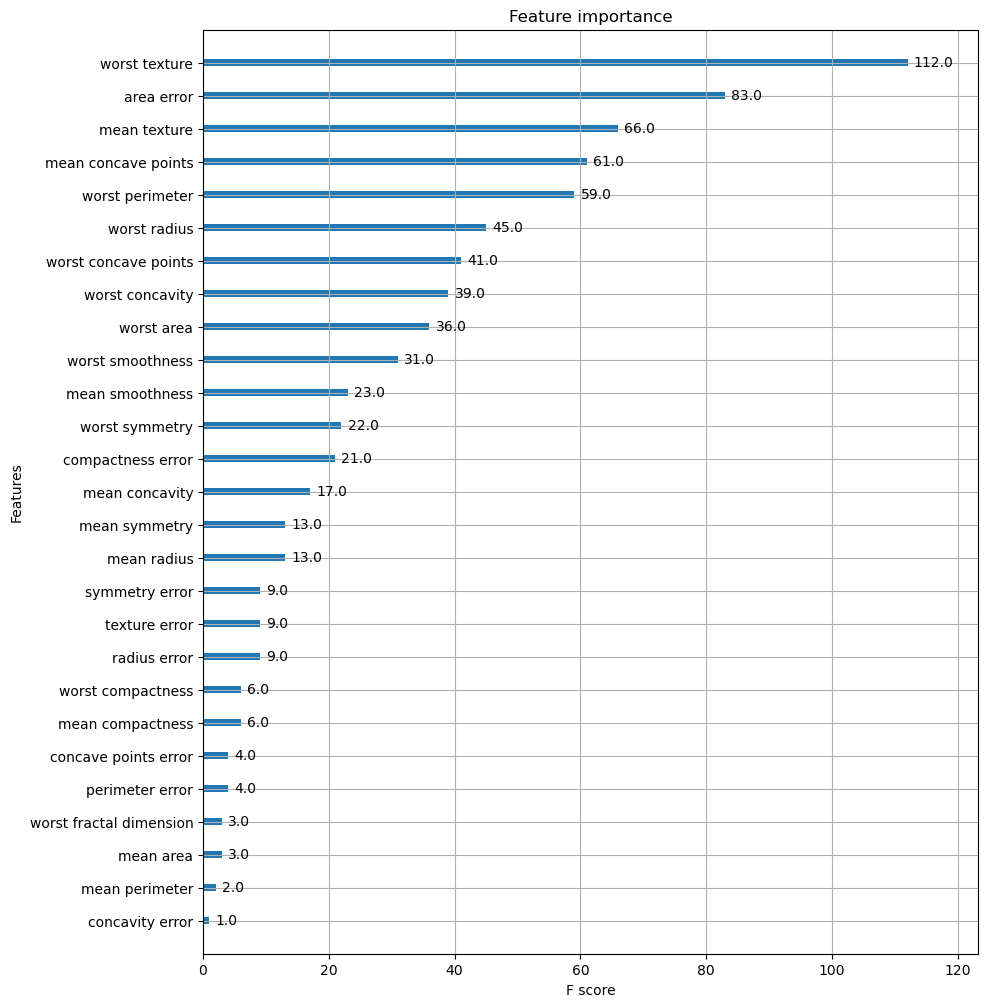

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

#### 5. 사이킷런 래퍼 XGBoost의 개요 및 적용
* 사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 fit()과 predict()만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있음

* 사이킷런을 위한 래퍼 XGBoost
  * XGBClassifier: 분류를 위한 래퍼 클래스
  * XGBRegressor: 회귀를 위한 래퍼 클래스
* XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경함
  * eta → learning_rate
  * sub_sample → subsample
  * lambda → reg_lambda
  * alpha → reg_alpha
* xgboost의 n_estimators와 num_boost_round 하이퍼 파라미터는 서로 동일한 파라미터. 만일 두 개가 동시에 사용되면,
  * 파이썬 래퍼 XGBoost API에서는 num_boost_round 파라미터를 적용
  * 사이킷런 래퍼 XGBoost 클래스에서는 n_estimators 파라미터를 적용

**위스콘신 유방암 데이터 세트 분류**  
&nbsp;학습 데이터는 앞 예제와 다르게 검증 데이터로 분할되기 이전인 X_train과 y_train을 이용하고 테스트 데이터 세트는 그대로 X_test와 y_test를 사용

**1. XGBClassifier 클래스의 fit(), predic(), predict_proba()를 이용해 학습과 예측을 수행**

In [67]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                           eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

**2. get_clf_eval()을 이용해 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가**

In [68]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


→ 앞 예제의 파이썬 래퍼 XGBoost보다 더 좋은 평가 결과  
→ 위스콘신 **데이터 세트의 개수가 워낙 작은데**, 이전에는 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr과 X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정  

→ **데이터 건수가 많은 경우**라면, 원본 학습 데이터를 다시 학습과 검증 데이터로 분리하고 여기에 조기 중단 횟수를 적절하게 부여할 경우 일반적으로는 과적합을 개선할 수 있어서 모델 성능이 향상될 수 있음

**3. 사이킷런 래퍼 XGBoost에서 조기 중단을 수행**  
&nbsp;조기 중단 관련된 파라미터를 fit()에 입력: early_stopping_rounds, eval_metric, eval_set

In [69]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

→ eval_set는 파이썬 래퍼일 때와 살짝 다르게 학습과 검증을 의미하는 문자열을 넣어주지 않아도 됨  
→ \[(X_tr, y_tr), (X_val, y_val)]와 같이 지정하면 맨 앞의 튜플이 학습용 데이터, 뒤의 튜플이 검증용 데이터로 자동 인식  

→ 위의 예제와 마찬가지로 126번째 반복에서 검증 데이터 세트의 성능 평가인 validation_1-logloss가 0.25587로 가장 낮았고, 이후 50번 반복까지 더 이상 성능이 향상되지 않았기 때문에 **학습이 조기 종료됨**

**4. 조기 중단으로 학습된 XGBClassifier의 예측 성능 확인**

In [70]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9933


→ 파이썬 래퍼의 조기 중단 성능과 동일  
→ 위스콘신 데이터 세트가 워낙 작아서, 조기 중단을 위한 검증 데이터를 분리하면서 검증 데이터가 없는 학습 데이터를 사용했을 때보다 성능이 약간 저조함

**5. 조기 중단값을 너무 급격하게 줄였을 때의 예측 성능 확인**  
&nbsp;아직 성능이 향상될 여지가 있음에도 불구하고 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음

In [75]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [76]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1: 0.9610, AUC: 0.9933


→ 93번째 반복부터 10번 반복하는 동안 성능 평가 지수가 향상되지 못해서 더 이상 수행하지 않고 학습이 종료됨  
→ 이렇게 학습된 모델로 예측한 결과 정확도는 약 0.9474로 early_stopping_rounds=50일 때의 약 0.9561보다 낮음

**6. plot_importance() API를 이용해 피처의 중요도를 막대그래프 시각화**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

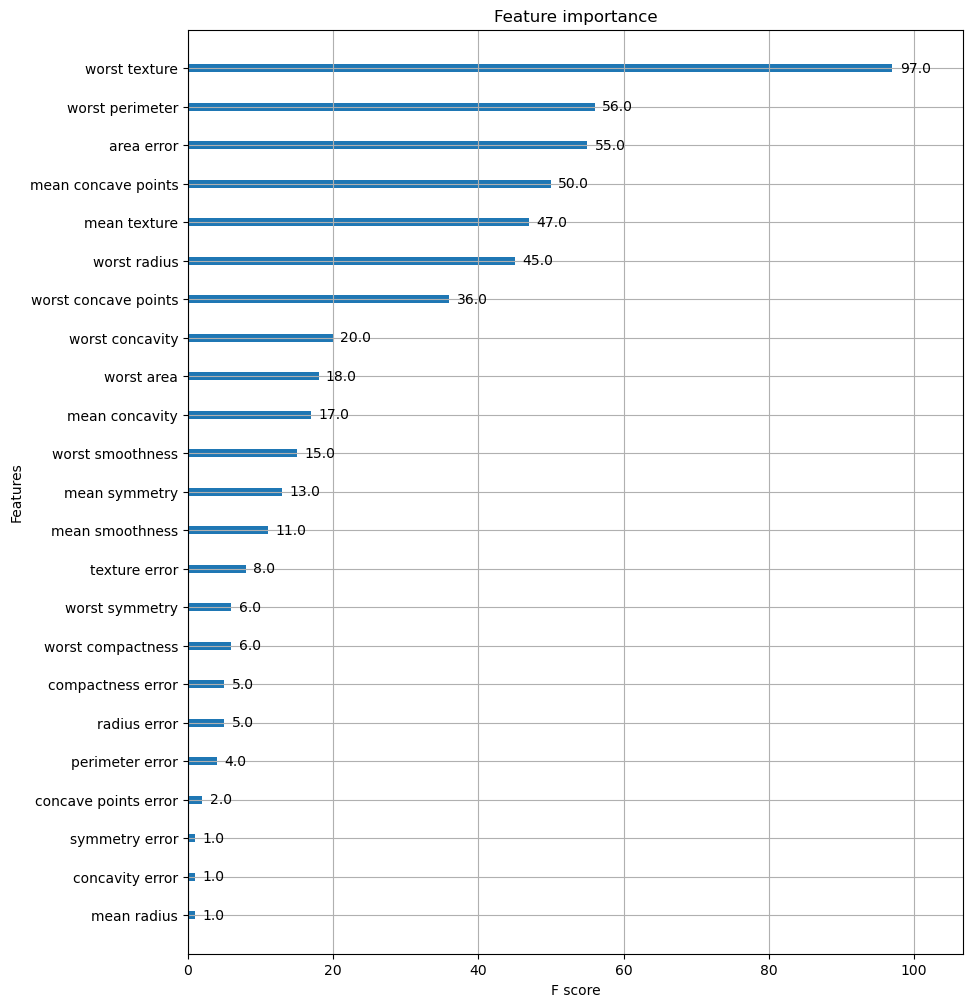

In [77]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)